In [29]:
from models.track import trackYeasts, getCellStatistics
from models.artilife.model import Artilife
from skimage.io import imread
from sklearn.cluster import KMeans
from cv2 import merge
import numpy as np
import matplotlib.pyplot as plt

In [23]:
phase_ims = imread("test_images/test_phase.tif")
cp_masks = imread("test_images/test_tracked.tif")
#phase_ims = [merge((im,im,im)) for im in phase_ims]
#len(phase_ims), phase_ims[0].shape
phase_ims.shape, cp_masks.shape

((10, 520, 692), (10, 520, 692))

In [24]:
cellData = getCellStatistics(cp_masks)
cellData

,Cell,Birth,Death,Sizes,Center of Mass X,Center of Mass Y,Angle of Major Axis,Length Major Axis,Length Minor Axis,Aspect Ratio
0,1,0,9,"[401, 393, 401, 398, 397, 398, 399, 412, 408, ...","[135.59102244389027, 135.49872773536896, 135.4...","[65.38653366583542, 65.29516539440203, 65.1122...","[-107.21375630356144, -102.10877855983844, -95...","[23.871318315629164, 23.466332130723742, 23.77...","[21.494202948182295, 21.463424948954945, 21.61...","[1.110593324775874, 1.093317221577273, 1.10013..."
1,2,0,9,"[47, 79, 104, 136, 159, 184, 211, 230, 261, 282]","[149.2340425531915, 149.50632911392404, 150.26...","[58.59574468085106, 57.53164556962025, 57.0769...","[80.38722371557999, -106.12293327543468, -177....","[8.161945375916446, 10.43912538778473, 11.9058...","[7.511609401630607, 9.778709941314455, 11.2402...","[1.0865774482555848, 1.0675360503004654, 1.059..."
2,3,0,9,"[274, 279, 282, 293, 283, 290, 299, 301, 303, ...","[172.05109489051094, 172.4336917562724, 172.42...","[68.78467153284672, 68.7921146953405, 68.73758...","[-32.01921602117548, -47.89402155691223, -47.3...","[21.93728694822487, 21.738524980576326, 22.109...","[16.033563715618303, 16.505810073756415, 16.39...","[1.368210295435178, 1.3170226049759122, 1.3489..."
3,4,0,9,"[364, 364, 359, 348, 342, 347, 359, 359, 361, ...","[154.7445054945055, 154.62912087912088, 154.50...","[71.30494505494505, 71.3076923076923, 71.90529...","[-51.93605043596252, -62.77918804335605, -78.2...","[23.390653200915636, 23.360709233037543, 23.13...","[19.978550288874267, 20.01364296123854, 19.889...","[1.1707883136015886, 1.167239231672187, 1.1630..."
4,5,0,9,"[295, 306, 294, 302, 309, 320, 330, 343, 347, ...","[118.59322033898304, 118.18300653594771, 118.1...","[75.25762711864407, 74.47385620915033, 74.3333...","[62.29733695766183, 70.73165268686577, 83.1868...","[22.65075521545737, 22.928116579862255, 22.633...","[16.640561378178162, 17.095165467401184, 16.61...","[1.3611773485695478, 1.3412047179995972, 1.362..."
...,...,...,...,...,...,...,...,...,...,...
135,136,8,9,"[0, 0, 0, 0, 0, 0, 0, 0, 103, 138]","[0, 0, 0, 0, 0, 0, 0, 0, 422.1456310679612, 42...","[0, 0, 0, 0, 0, 0, 0, 0, 515.4563106796116, 51...","[0, 0, 0, 0, 0, 0, 0, 0, 173.66376180025594, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 14.340910923015496, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 9.41650972464972, 11....","[0, 0, 0, 0, 0, 0, 0, 0, 1.5229539757682307, 1..."
136,137,9,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 166.5581395348837]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 77.18604651162791]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 162.5140662211678]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 7.733525988380188]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 7.306143286193354]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.058496348270978]"
137,138,9,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 74]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 419.13513513513516]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 312.4054054054054]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 23.489472963507403]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 10.36090422364958]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 9.30116742678116]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.1139358908664612]"
138,139,9,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 70]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 405.45714285714286]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 330.2857142857143]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 136.83748501126885]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 11.56972999269042]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 8.09210322757453]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.4297556107867706]"


In [25]:
X = cellData["Sizes"].to_list()

X = np.array(X)
X.shape


(140, 10)

In [31]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [32]:
new_data = []
for label in kmeans.labels_:
    


array([4, 1, 3, 4, 3, 1, 4, 5, 0, 4, 5, 3, 4, 0, 3, 1, 3, 4, 3, 4, 0, 4,
       4, 4, 3, 1, 5, 3, 4, 4, 3, 5, 4, 4, 5, 5, 3, 0, 0, 1, 0, 4, 3, 4,
       5, 3, 4, 1, 5, 1, 3, 4, 3, 4, 4, 1, 5, 1, 3, 0, 3, 3, 4, 4, 4, 1,
       4, 0, 1, 4, 4, 3, 3, 3, 0, 1, 4, 4, 4, 3, 4, 4, 5, 3, 4, 4, 3, 5,
       0, 4, 4, 4, 1, 4, 3, 5, 4, 4, 3, 1, 1, 6, 1, 3, 1, 3, 6, 1, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

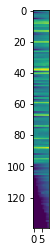

In [33]:
plt.imshow(X); plt.show()

In [11]:
Artilife.hyperparams

{'Mean Diameter': 0,
 'Flow Threshold': 0.4,
 'Cell Probability Threshold': 0,
 'Mating Cells': False,
 'Sporulating Cells': False,
 'Time Series': False}

In [12]:
myParams = Artilife.hyperparams.copy()
myParams["Time Series"] = True
myParams

{'Mean Diameter': 0,
 'Flow Threshold': 0.4,
 'Cell Probability Threshold': 0,
 'Mating Cells': False,
 'Sporulating Cells': False,
 'Time Series': True}

In [15]:
weight_path = "models/artilife/artilife"
return_dict = Artilife.run(phase_ims, myParams, weight_path)

class params {'Mean Diameter': None, 'Flow Threshold': 0.4, 'Cell Probability Threshold': 0, 'Mating Cells': False, 'Sporulating Cells': False, 'Time Series': True}
Running Artilife


NameError: name 'Mask2' is not defined